In [37]:
import pandas as pd
import os

file_path = '/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Nov_6_309nm_360nm/Pandora291s1_ColumbiaMD_20241106_L0_part0 2.txt'

base_name = os.path.basename(file_path)
csv_file_name = os.path.splitext(base_name)[0] + '.csv'

# Read the entire file
with open(file_path, 'r', encoding='latin1') as file:
    lines = file.readlines()

# data_lines = lines[46:]
data_lines = lines

# Process each line to split into rows and columns
data_list = []
for line in data_lines:
    # Strip the newline character and split by tabs
    rows = line.strip().split('\t')
    for row in rows:
        # Split each row by spaces
        columns = row.split()
        data_list.append(columns)

# Convert the list of lists into a DataFrame
data8 = pd.DataFrame(data_list)
# Convert the necessary columns to numeric before saving
data8.iloc[:, 2:] = data8.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Define the column names
column_names = [
    'routine', 'time (yyyymmddThhmmssZ)', 'Routine count', 'Repetition count', 'measurement duration (s)',
    'Integration time [ms]', 'Number of cycles', 'Saturation index', 'filterwheel 1', 'filterwheel 2',
    'Pointing zenith angle (degree)', 'Zenith pointing mode', 'Pointing azimuth (degree)', 'Azimuth pointing mode',
    'Mean over camera offsets [deg]','Max over camera offsets [deg]',
    'Data processing type', 'Target distance [m]', 'Temperature at electronics board (C)',
    'Spectrometer control temperature (C)', 'Auxiliary spectrometer temperature (C)', 'Temperature in head sensor (C)',
    'Humidity in head sensor (%)', 'Pressure in head sensor (hPa)', 'Scale factor for data', 'Uncertainty indicator'
] + [f'Mean pixel {i}' for i in range(1, 2049)] + [f'Uncertainty {i}' for i in range(1, 2049)]

# Assign column names to the DataFrame
data8.columns = column_names

save_folder = "/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Nov_6_309nm_360nm/"

# Save the DataFrame to a CSV file with the same name as the initial text file
data8.to_csv(os.path.join(save_folder, csv_file_name), index=False)

print(f"Data saved to {os.path.join(save_folder, csv_file_name)}")

Data saved to /Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Nov_6_309nm_360nm/Pandora291s1_ColumbiaMD_20241106_L0_part0 2.csv


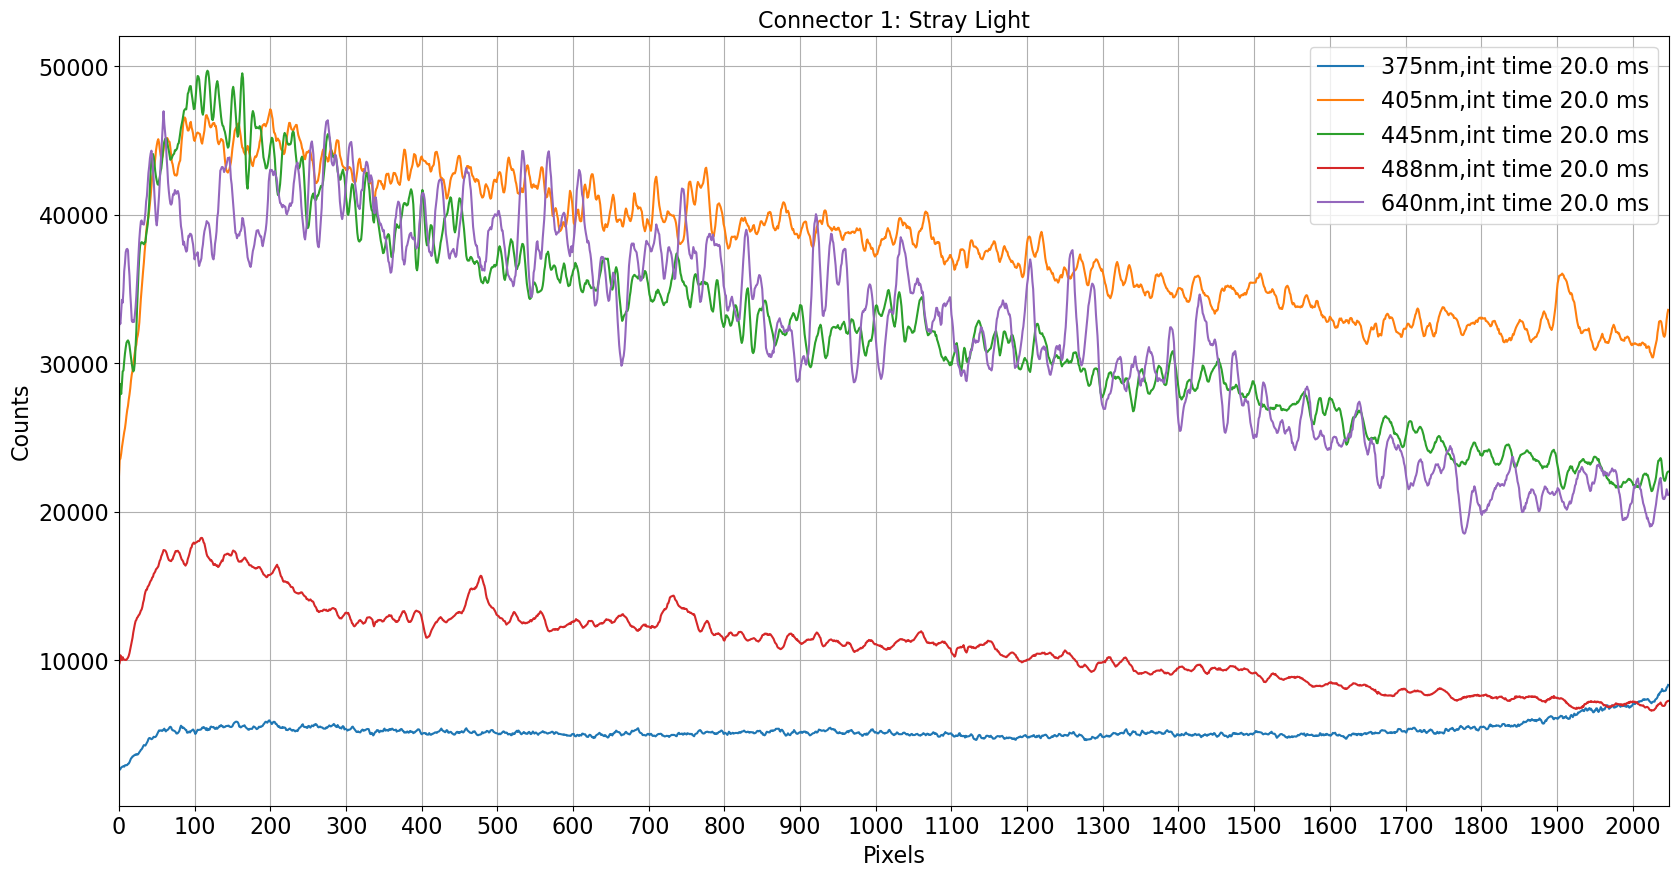

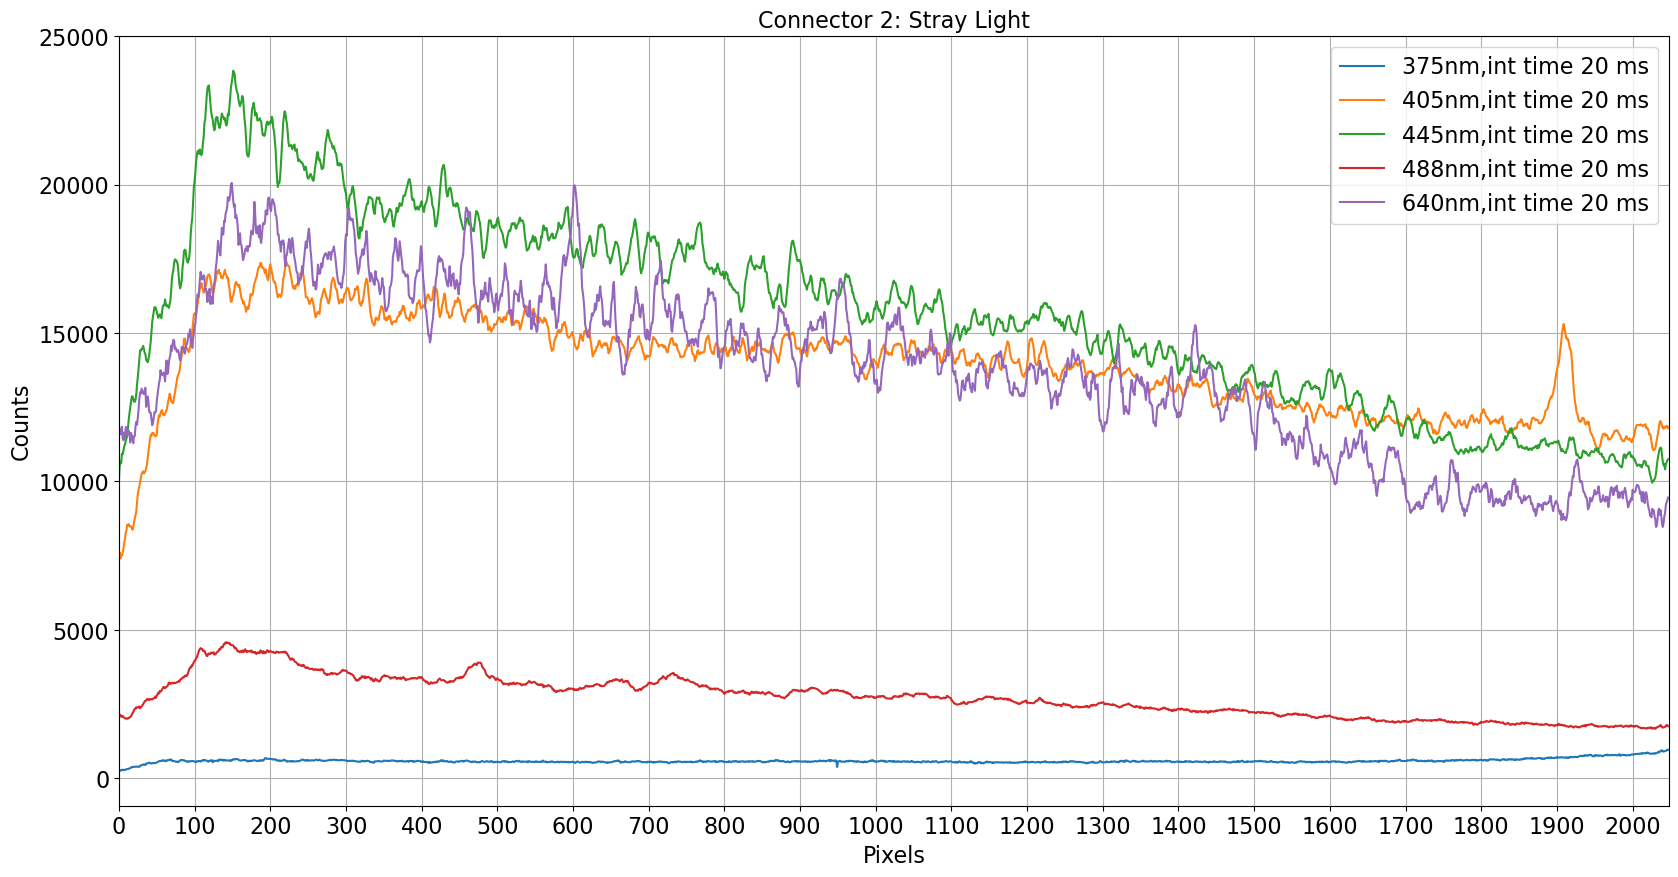

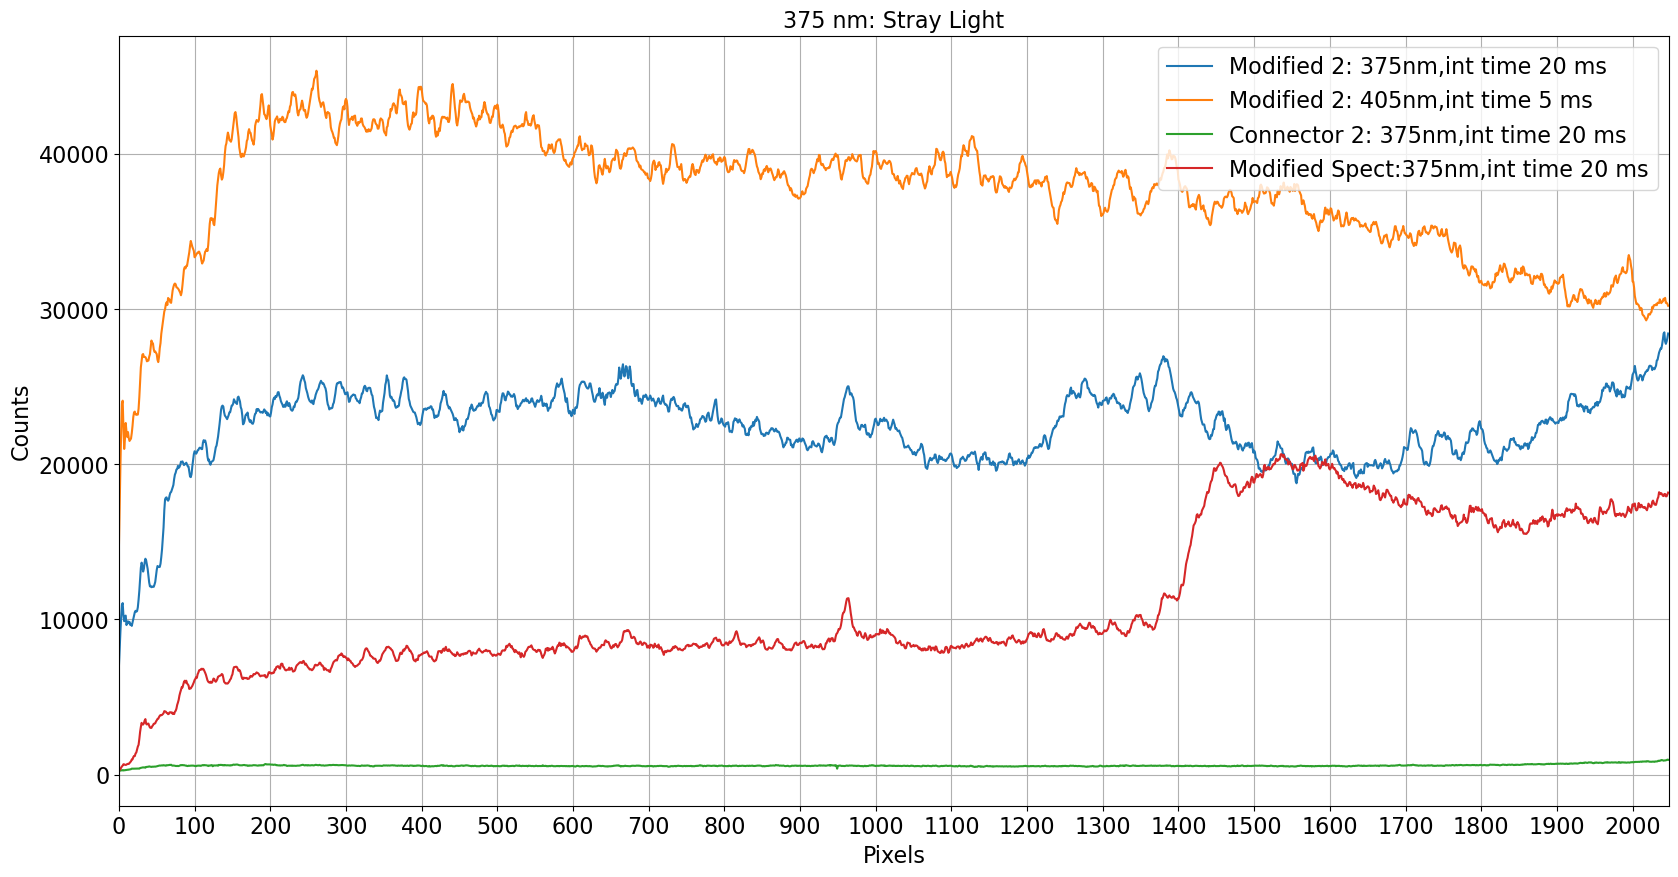

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pixels = np.arange(0, 2048)

lsf_375nm_bc = ((data8.iloc[0:3, 26:2074]).div(data8.iloc[0:3, 24], axis=0)).values
dc_1 = ((data8.iloc[3:6, 26:2074]).div(data8.iloc[3:6, 24], axis=0)).values
m_lsf_375nm = lsf_375nm_bc - dc_1
int_375 = np.array([2.4, 10, 20])

lsf_405nm_bc = ((data8.iloc[6:9, 26:2074]).div(data8.iloc[6:9, 24], axis=0)).values
m_lsf_405nm = lsf_405nm_bc - dc_1
int_405 = int_375

lsf_445nm_bc = ((data8.iloc[9:12, 26:2074]).div(data8.iloc[9:12, 24], axis=0)).values
m_lsf_445nm = lsf_445nm_bc - dc_1
int_445 = int_375

lsf_488nm_bc = ((data8.iloc[12:15, 26:2074]).div(data8.iloc[12:15, 24], axis=0)).values
m_lsf_488nm = lsf_488nm_bc - dc_1
int_488 = int_375

lsf_640nm_bc = ((data8.iloc[15:18, 26:2074]).div(data8.iloc[15:18, 24], axis=0)).values
lsf_640nm = lsf_640nm_bc - dc_1
int_640 = int_375



lsf_375nm_bc2 = ((data8.iloc[19:22, 26:2074]).div(data8.iloc[19:22, 24], axis=0)).values
dc_375 = ((data8.iloc[22:25, 26:2074]).div(data8.iloc[22:25, 24], axis=0)).values
m_lsf_375nm2 = lsf_375nm_bc - dc_375
int_3752 = np.array([20, 100, 300])

lsf_405nm_bc2 = ((data8.iloc[26:29, 26:2074]).div(data8.iloc[26:29, 24], axis=0)).values
dc_4052 = ((data8.iloc[29:32, 26:2074]).div(data8.iloc[29:32, 24], axis=0)).values
m_lsf_405nm2 = lsf_405nm_bc2 - dc_4052
int_4052 = np.array([20, 50, 60])

lsf_445nm_bc2 = ((data8.iloc[32:35, 26:2074]).div(data8.iloc[32:35, 24], axis=0)).values
m_lsf_445nm2 = lsf_445nm_bc2 - dc_4052
int_4452 = np.array([20, 50, 60])

lsf_488nm_bc2 = ((data8.iloc[35:39, 26:2074]).div(data8.iloc[35:39, 24], axis=0)).values
dc_4882 = ((data8.iloc[39:43, 26:2074]).div(data8.iloc[39:43, 24], axis=0)).values
m_lsf_488nm2 = lsf_488nm_bc2 - dc_4882
int_4882 = np.array([20, 50, 100, 300])

lsf_640nm_bc2 = ((data8.iloc[43:46, 26:2074]).div(data8.iloc[43:46, 24], axis=0)).values
lsf_640nm2 = lsf_640nm_bc2 - dc_4052
int_6402 = np.array([20, 50, 60])

##Modified
mod_lsf_375nm_bc2 = ((data8.iloc[46:49, 26:2074]).div(data8.iloc[46:49, 24], axis=0)).values
mod_dc_375 = ((data8.iloc[49:52, 26:2074]).div(data8.iloc[49:52, 24], axis=0)).values
mod_lsf_375nm2 = mod_lsf_375nm_bc2 - mod_dc_375
mod_int_3752 = np.array([20, 50, 60])

##Modified 3
mod_lsf_405nm_bc3 = ((data8.iloc[52, 26:2074]).div(data8.iloc[52, 24], axis=0)).values
dc_4053 = ((data8.iloc[53, 26:2074]).div(data8.iloc[53, 24], axis=0)).values
mod_lsf_405nm3 = mod_lsf_405nm_bc3 - dc_4053
mod_int_4053 = np.array([5])

mod_lsf_375nm_bc3 = ((data8.iloc[54:56, 26:2074]).div(data8.iloc[54:56, 24], axis=0)).values
mod_dc_3753 = ((data8.iloc[56:58, 26:2074]).div(data8.iloc[56:58, 24], axis=0)).values
mod_lsf_375nm3 = mod_lsf_375nm_bc3 - mod_dc_3753
mod_int_3753 = np.array([5, 20])


plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(2,3):
    plt.plot(m_lsf_375nm[row, :], label= f'375nm,int time {int_375[row]} ms')
    plt.plot(m_lsf_405nm[row, :], label= f'405nm,int time {int_405[row]} ms')
    plt.plot(m_lsf_445nm[row, :], label= f'445nm,int time {int_445[row]} ms')
    plt.plot(m_lsf_488nm[row, :], label= f'488nm,int time {int_488[row]} ms')
    plt.plot(lsf_640nm[row, :], label= f'640nm,int time {int_640[row]} ms') 
plt.xticks(np.arange(0, 2048, 100),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Connector 1: Stray Light',fontsize=16)
# plt.ylim(-200,800)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(0,1):
    plt.plot(m_lsf_375nm2[row, :], label= f'375nm,int time {int_3752[row]} ms')
    plt.plot(m_lsf_405nm2[row, :], label= f'405nm,int time {int_4052[row]} ms')
    plt.plot(m_lsf_445nm2[row, :], label= f'445nm,int time {int_4452[row]} ms')
    plt.plot(m_lsf_488nm2[row, :], label= f'488nm,int time {int_4882[row]} ms')
    plt.plot(lsf_640nm2[row, :], label= f'640nm,int time {int_6402[row]} ms') 
plt.xticks(np.arange(0, 2048, 100),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Connector 2: Stray Light',fontsize=16)
plt.legend(fontsize=16)
# plt.ylim(0,50000)
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
# plt.plot(m_lsf_375nm[2, :], label= f'Connector 1: 375nm,int time {int_375[2]} ms')
plt.plot(mod_lsf_375nm3[1, :], label= f'Modified 2: 375nm,int time {mod_int_3753[1]} ms')
plt.plot(mod_lsf_405nm3, label= f'Modified 2: 405nm,int time {mod_int_4053[0]} ms')
for row in range(0,1):
    plt.plot(m_lsf_375nm2[row, :], label= f'Connector 2: 375nm,int time {int_3752[row]} ms')
    plt.plot(mod_lsf_375nm2[row, :], label= f'Modified Spect:375nm,int time {mod_int_3752[row]} ms')

plt.xticks(np.arange(0, 2048, 100),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('375 nm: Stray Light',fontsize=16)
# plt.ylim(-200,800)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

In [155]:
import pandas as pd
import os

file_path = '/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Nov_6_309nm_360nm/Pandora288s1_Agam_20241108_L0_part0 5.txt'

base_name = os.path.basename(file_path)
csv_file_name = os.path.splitext(base_name)[0] + '.csv'

# Read the entire file
with open(file_path, 'r', encoding='latin1') as file:
    lines = file.readlines()

# data_lines = lines[46:]
data_lines = lines

# Process each line to split into rows and columns
data_list = []
for line in data_lines:
    # Strip the newline character and split by tabs
    rows = line.strip().split('\t')
    for row in rows:
        # Split each row by spaces
        columns = row.split()
        data_list.append(columns)

# Convert the list of lists into a DataFrame
data9 = pd.DataFrame(data_list)
# Convert the necessary columns to numeric before saving
data9.iloc[:, 2:] = data9.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Define the column names
column_names = [
    'routine', 'time (yyyymmddThhmmssZ)', 'Routine count', 'Repetition count', 'measurement duration (s)',
    'Integration time [ms]', 'Number of cycles', 'Saturation index', 'filterwheel 1', 'filterwheel 2',
    'Pointing zenith angle (degree)', 'Zenith pointing mode', 'Pointing azimuth (degree)', 'Azimuth pointing mode',
    'Mean over camera offsets [deg]','Max over camera offsets [deg]',
    'Data processing type', 'Target distance [m]', 'Temperature at electronics board (C)',
    'Spectrometer control temperature (C)', 'Auxiliary spectrometer temperature (C)', 'Temperature in head sensor (C)',
    'Humidity in head sensor (%)', 'Pressure in head sensor (hPa)', 'Scale factor for data', 'Uncertainty indicator'
] + [f'Mean pixel {i}' for i in range(1, 2049)] + [f'Uncertainty {i}' for i in range(1, 2049)]

# Assign column names to the DataFrame
data9.columns = column_names

save_folder = "/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Nov_6_309nm_360nm/"

# Save the DataFrame to a CSV file with the same name as the initial text file
data9.to_csv(os.path.join(save_folder, csv_file_name), index=False)

print(f"Data saved to {os.path.join(save_folder, csv_file_name)}")

Data saved to /Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/Nov_6_309nm_360nm/Pandora288s1_Agam_20241108_L0_part0 5.csv


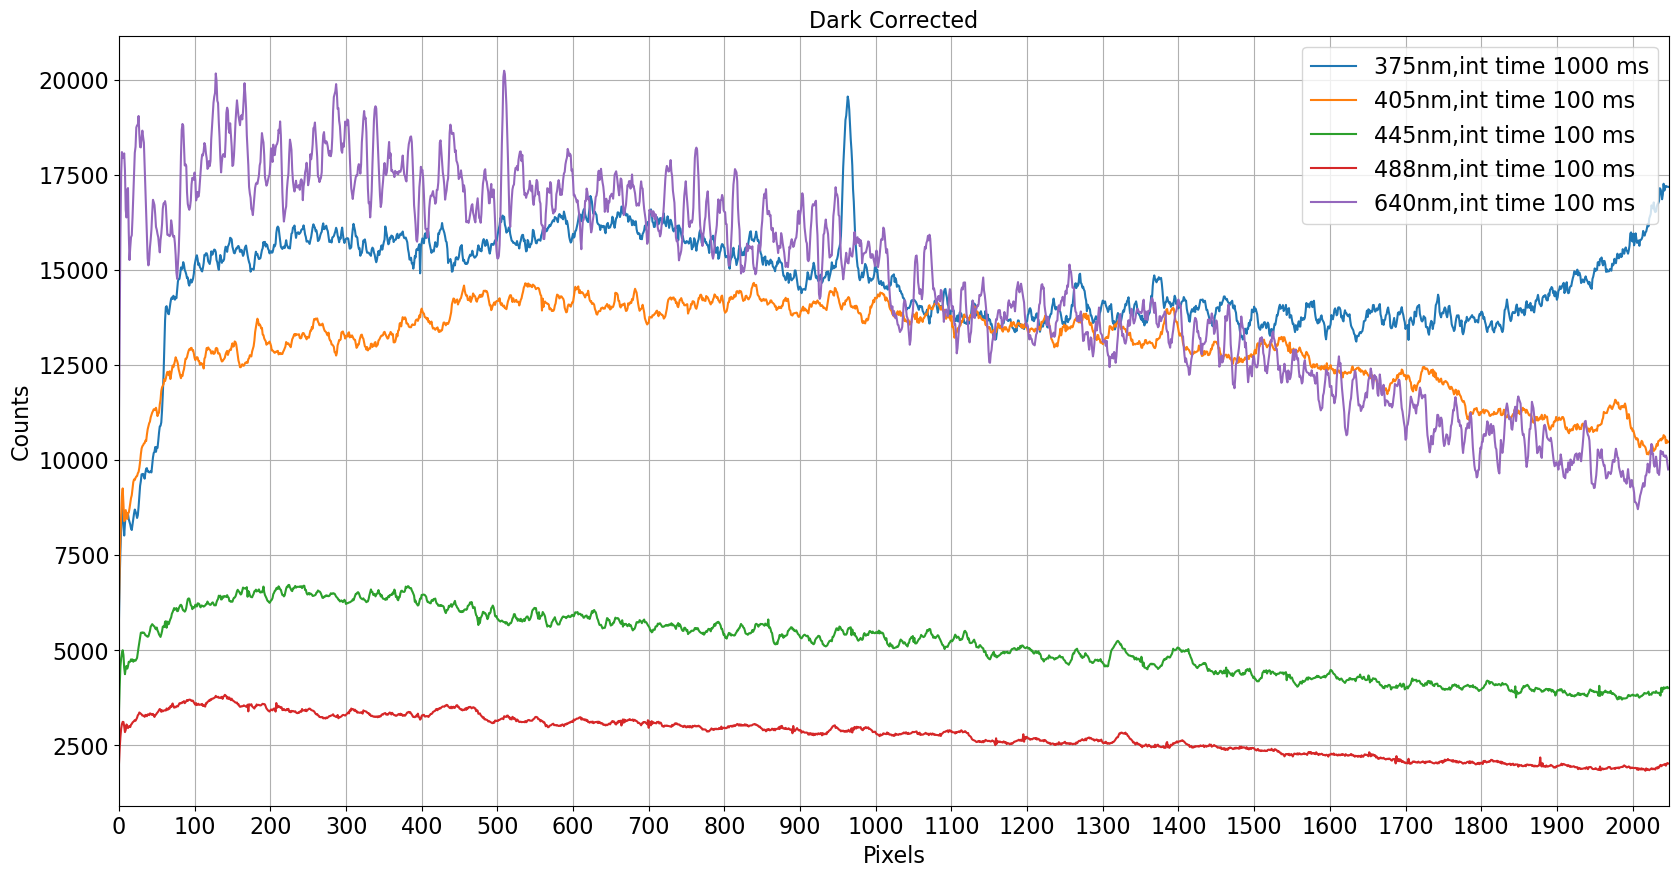

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pixels = np.arange(0, 2048)

l_375nm_bc = ((data9.iloc[0:2, 26:2074]).div(data9.iloc[0:2, 24], axis=0)).values
l_375nm_7 = ((data9.iloc[2:4, 26:2074]).div(data9.iloc[2:4, 24], axis=0)).values
l_375nm_8 = ((data9.iloc[4:6, 26:2074]).div(data9.iloc[4:6, 24], axis=0)).values
l_375nm_9 = ((data9.iloc[6:8, 26:2074]).div(data9.iloc[6:8, 24], axis=0)).values
dc_375nm = ((data9.iloc[8:10, 26:2074]).div(data9.iloc[8:10, 24], axis=0)).values
cc_375nm_dc = l_375nm_bc - dc_375nm
cc_375nm_7 = l_375nm_bc - l_375nm_7
cc_375nm_8 = l_375nm_bc - l_375nm_8
cc_375nm_9 = l_375nm_bc - l_375nm_9
i_375 = np.array([1000, 3000])

l_405nm_bc = ((data9.iloc[10:12, 26:2074]).div(data9.iloc[10:12, 24], axis=0)).values
l_405nm_7 = ((data9.iloc[12:14, 26:2074]).div(data9.iloc[12:14, 24], axis=0)).values
l_405nm_8 = ((data9.iloc[14:16, 26:2074]).div(data9.iloc[14:16, 24], axis=0)).values
l_405nm_9 = ((data9.iloc[16:18, 26:2074]).div(data9.iloc[16:18, 24], axis=0)).values
dc_405nm = ((data9.iloc[18:20, 26:2074]).div(data9.iloc[18:20, 24], axis=0)).values
cc_405nm_dc = l_405nm_bc - dc_405nm
cc_405nm_7 = l_405nm_bc - l_405nm_7
cc_405nm_8 = l_405nm_bc - l_405nm_8
cc_405nm_9 = l_405nm_bc - l_405nm_9
i_405 = np.array([100, 300])

l_445nm_bc = ((data9.iloc[20:22, 26:2074]).div(data9.iloc[20:22, 24], axis=0)).values
l_445nm_7 = ((data9.iloc[22:24, 26:2074]).div(data9.iloc[22:24, 24], axis=0)).values
l_445nm_8 = ((data9.iloc[24:26, 26:2074]).div(data9.iloc[24:26, 24], axis=0)).values
l_445nm_9 = ((data9.iloc[26:28, 26:2074]).div(data9.iloc[26:28, 24], axis=0)).values
dc_445nm = ((data9.iloc[28:30, 26:2074]).div(data9.iloc[28:30, 24], axis=0)).values
cc_445nm_dc = l_445nm_bc - dc_445nm
cc_445nm_7 = l_445nm_bc - l_445nm_7
cc_445nm_8 = l_445nm_bc - l_445nm_8
cc_445nm_9 = l_445nm_bc - l_445nm_9
i_445 = np.array([100, 500])

l_488nm_bc = ((data9.iloc[30:32, 26:2074]).div(data9.iloc[30:32, 24], axis=0)).values
l_488nm_7 = ((data9.iloc[32:34, 26:2074]).div(data9.iloc[32:34, 24], axis=0)).values
l_488nm_8 = ((data9.iloc[34:36, 26:2074]).div(data9.iloc[34:36, 24], axis=0)).values
l_488nm_9 = ((data9.iloc[36:38, 26:2074]).div(data9.iloc[36:38, 24], axis=0)).values
dc_488nm = ((data9.iloc[38:40, 26:2074]).div(data9.iloc[38:40, 24], axis=0)).values
cc_488nm_dc = l_488nm_bc - dc_488nm
cc_488nm_7 = l_488nm_bc - l_488nm_7
cc_488nm_8 = l_488nm_bc - l_488nm_8
cc_488nm_9 = l_488nm_bc - l_488nm_9
i_488 = np.array([100, 1000])

l_640nm_bc = ((data9.iloc[40:42, 26:2074]).div(data9.iloc[40:42, 24], axis=0)).values
l_640nm_7 = ((data9.iloc[42:44, 26:2074]).div(data9.iloc[42:44, 24], axis=0)).values
l_640nm_8 = ((data9.iloc[44:46, 26:2074]).div(data9.iloc[44:46, 24], axis=0)).values
l_640nm_9 = ((data9.iloc[46:48, 26:2074]).div(data9.iloc[46:48, 24], axis=0)).values
dc_640nm = ((data9.iloc[48:50, 26:2074]).div(data9.iloc[48:50, 24], axis=0)).values
cc_640nm_dc = l_640nm_bc - dc_640nm
cc_640nm_7 = l_640nm_bc - l_640nm_7
cc_640nm_8 = l_640nm_bc - l_640nm_8
cc_640nm_9 = l_640nm_bc - l_640nm_9
i_640 = np.array([100, 300])

l_mercury_bc = ((data9.iloc[50:53, 26:2074]).div(data9.iloc[50:53, 24], axis=0)).values
l_mercury_7 = ((data9.iloc[53:56, 26:2074]).div(data9.iloc[53:56, 24], axis=0)).values
dc_mercury = ((data9.iloc[56:59, 26:2074]).div(data9.iloc[56:59, 24], axis=0)).values
cc_mercury_dc = l_mercury_bc - dc_mercury
cc_mercury_7 = l_mercury_bc - l_mercury_7
i_mercury = np.array([300, 1000, 4000])

l_fel_bc = ((data9.iloc[59, 26:2074]).div(data9.iloc[59, 24], axis=0)).values
l_fel_7 = ((data9.iloc[60, 26:2074]).div(data9.iloc[60, 24], axis=0)).values
l_fel_8 = ((data9.iloc[61, 26:2074]).div(data9.iloc[61, 24], axis=0)).values
l_fel_9 = ((data9.iloc[62, 26:2074]).div(data9.iloc[62, 24], axis=0)).values
dc_fel = ((data9.iloc[63, 26:2074]).div(data9.iloc[63, 24], axis=0)).values
cc_fel_dc = l_fel_bc - dc_mercury
cc_fel_7 = l_fel_bc - l_fel_7
cc_fel_8 = l_fel_bc - l_fel_8
cc_fel_9 = l_fel_bc - l_fel_9
i_fel = np.array([60])

plt.figure(figsize=(20, 10))
plt.xlim(0,2048)
for row in range(0,1):
    plt.plot(cc_375nm_dc[row, :], label= f'375nm,int time {i_375[row]} ms')
    plt.plot(cc_405nm_dc[row, :], label= f'405nm,int time {i_405[row]} ms')
    plt.plot(cc_445nm_dc[row, :], label= f'445nm,int time {i_445[row]} ms')
    plt.plot(cc_488nm_dc[row, :], label= f'488nm,int time {i_488[row]} ms')
    plt.plot(cc_640nm_dc[row, :], label= f'640nm,int time {i_640[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
plt.title('Dark Corrected',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()


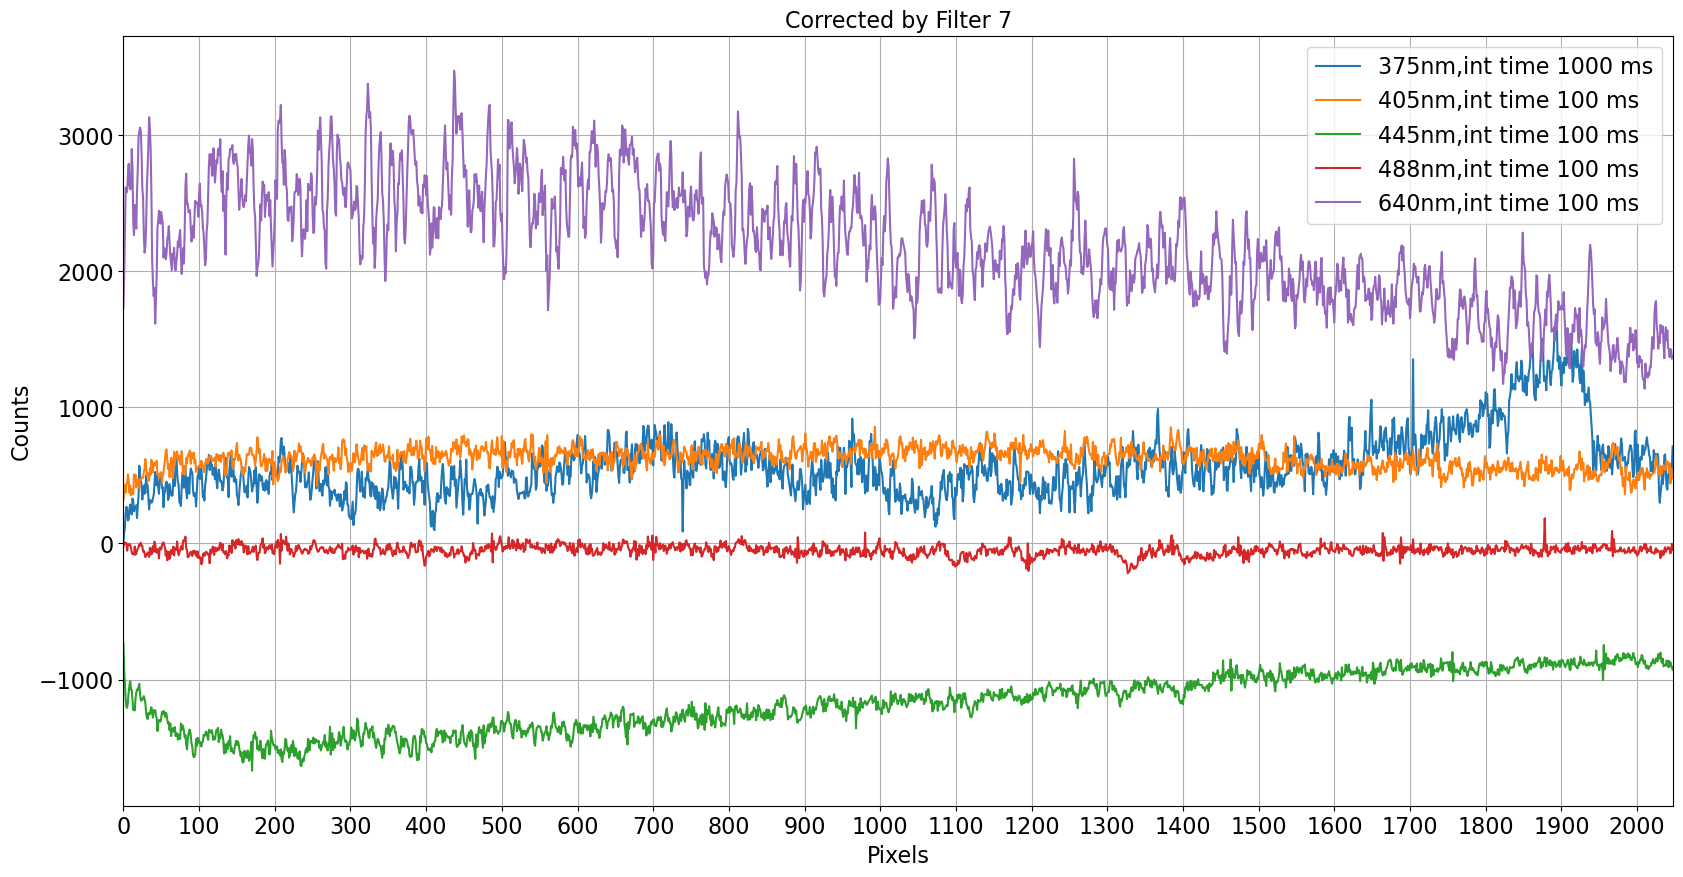

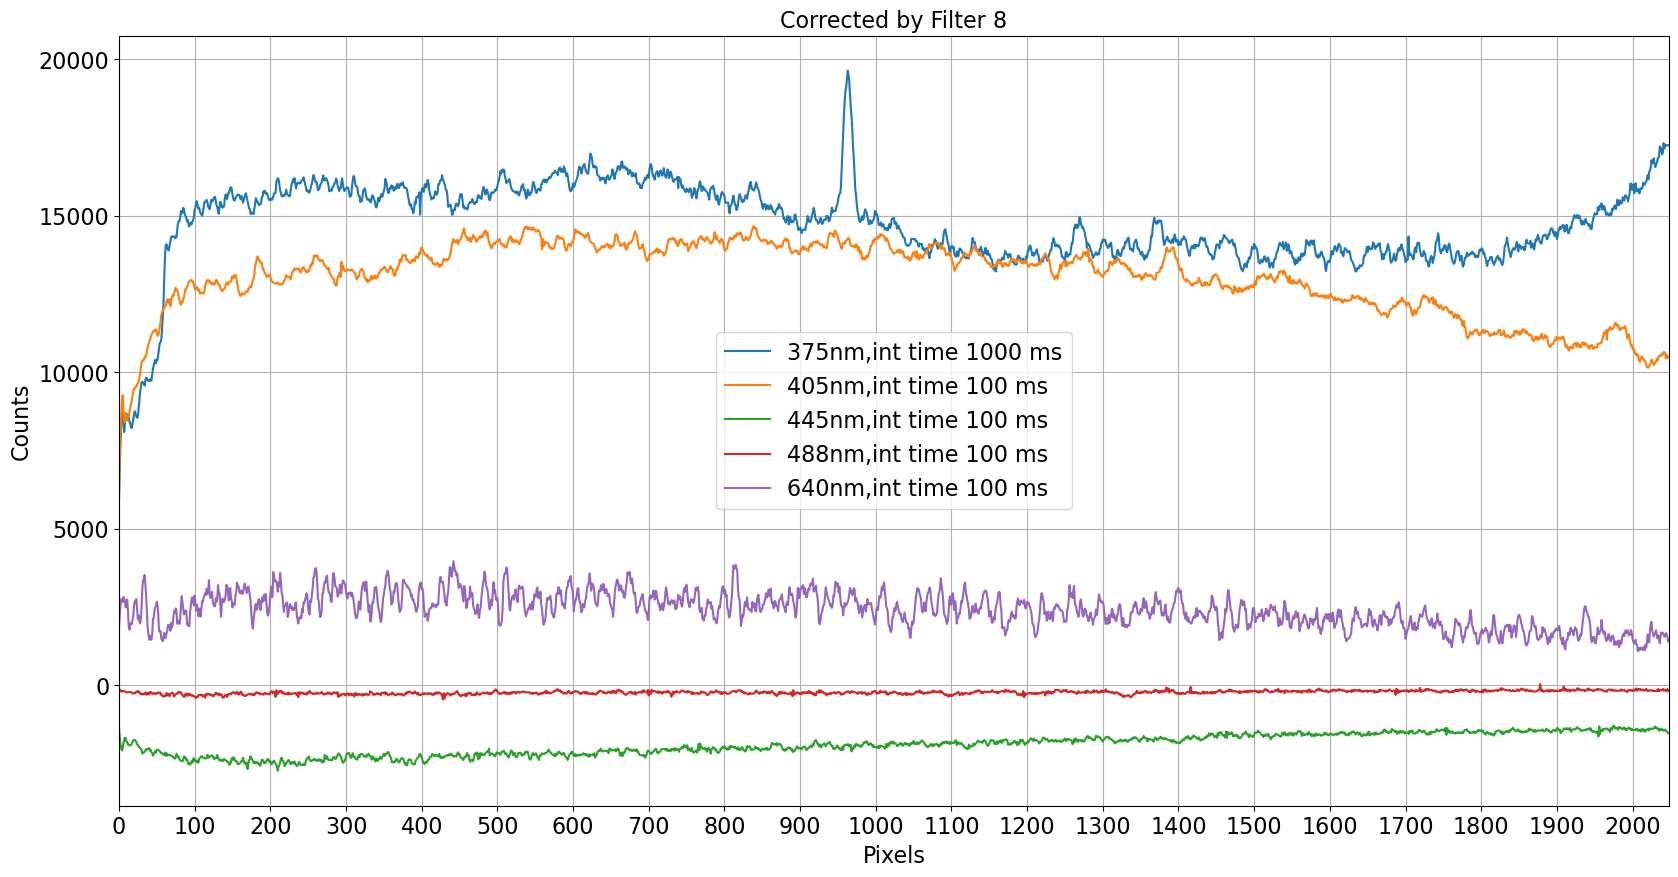

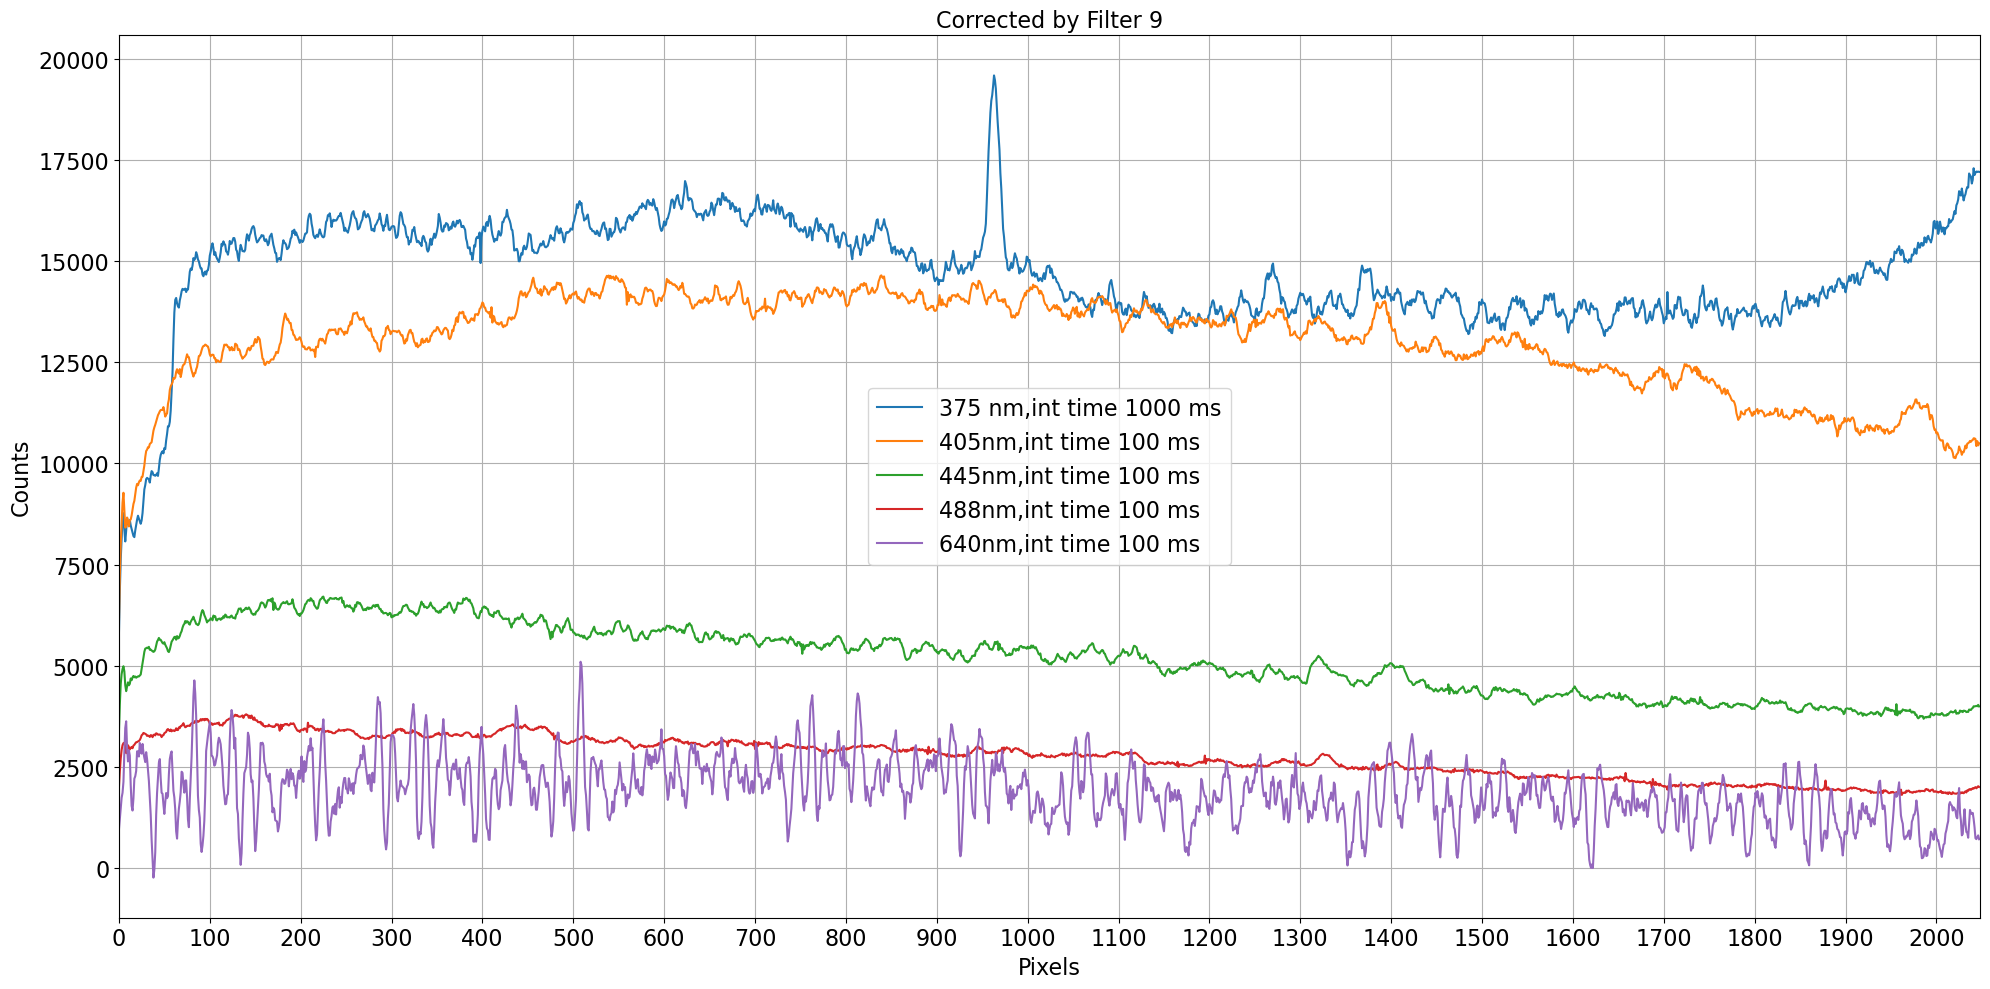

In [103]:
plt.figure(figsize=(20, 10))
# plt.subplot(3, 1, 1)
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(0,1):
    plt.plot(cc_375nm_7[row, :], label= f'375nm,int time {i_375[row]} ms')
    plt.plot(cc_405nm_7[row, :], label= f'405nm,int time {i_405[row]} ms')
    plt.plot(cc_445nm_7[row, :], label= f'445nm,int time {i_445[row]} ms')
    plt.plot(cc_488nm_7[row, :], label= f'488nm,int time {i_488[row]} ms')
    plt.plot(cc_640nm_7[row, :], label= f'640nm,int time {i_640[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
plt.title('Corrected by Filter 7',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()

plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(0,1):
    plt.plot(cc_375nm_8[row, :], label= f'375nm,int time {i_375[row]} ms')
    plt.plot(cc_405nm_8[row, :], label= f'405nm,int time {i_405[row]} ms')
    plt.plot(cc_445nm_8[row, :], label= f'445nm,int time {i_445[row]} ms')
    plt.plot(cc_488nm_8[row, :], label= f'488nm,int time {i_488[row]} ms')
    plt.plot(cc_640nm_8[row, :], label= f'640nm,int time {i_640[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
plt.title('Corrected by Filter 8',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()

plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(0,1):
    plt.plot(cc_375nm_9[row, :], label= f'375 nm,int time {i_375[row]} ms')
    plt.plot(cc_405nm_9[row, :], label= f'405nm,int time {i_405[row]} ms')
    plt.plot(cc_445nm_9[row, :], label= f'445nm,int time {i_445[row]} ms')
    plt.plot(cc_488nm_9[row, :], label= f'488nm,int time {i_488[row]} ms')
    plt.plot(cc_640nm_9[row, :], label= f'640nm,int time {i_640[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
plt.title('Corrected by Filter 9',fontsize=16);plt.legend(fontsize=16);plt.grid(True)

plt.tight_layout()
plt.show()

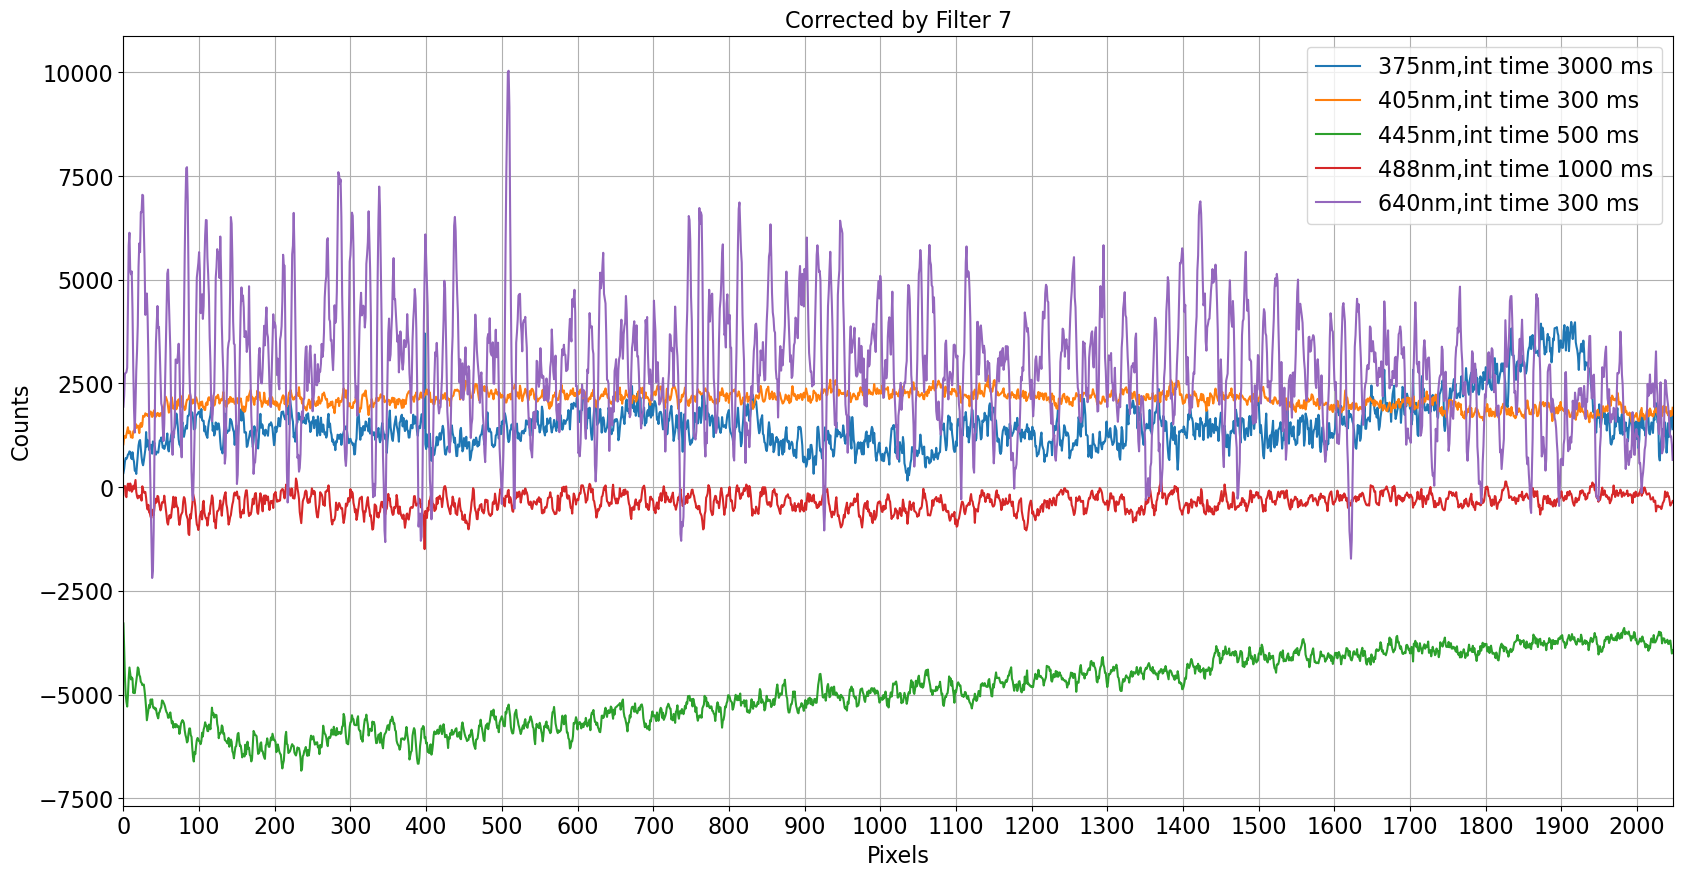

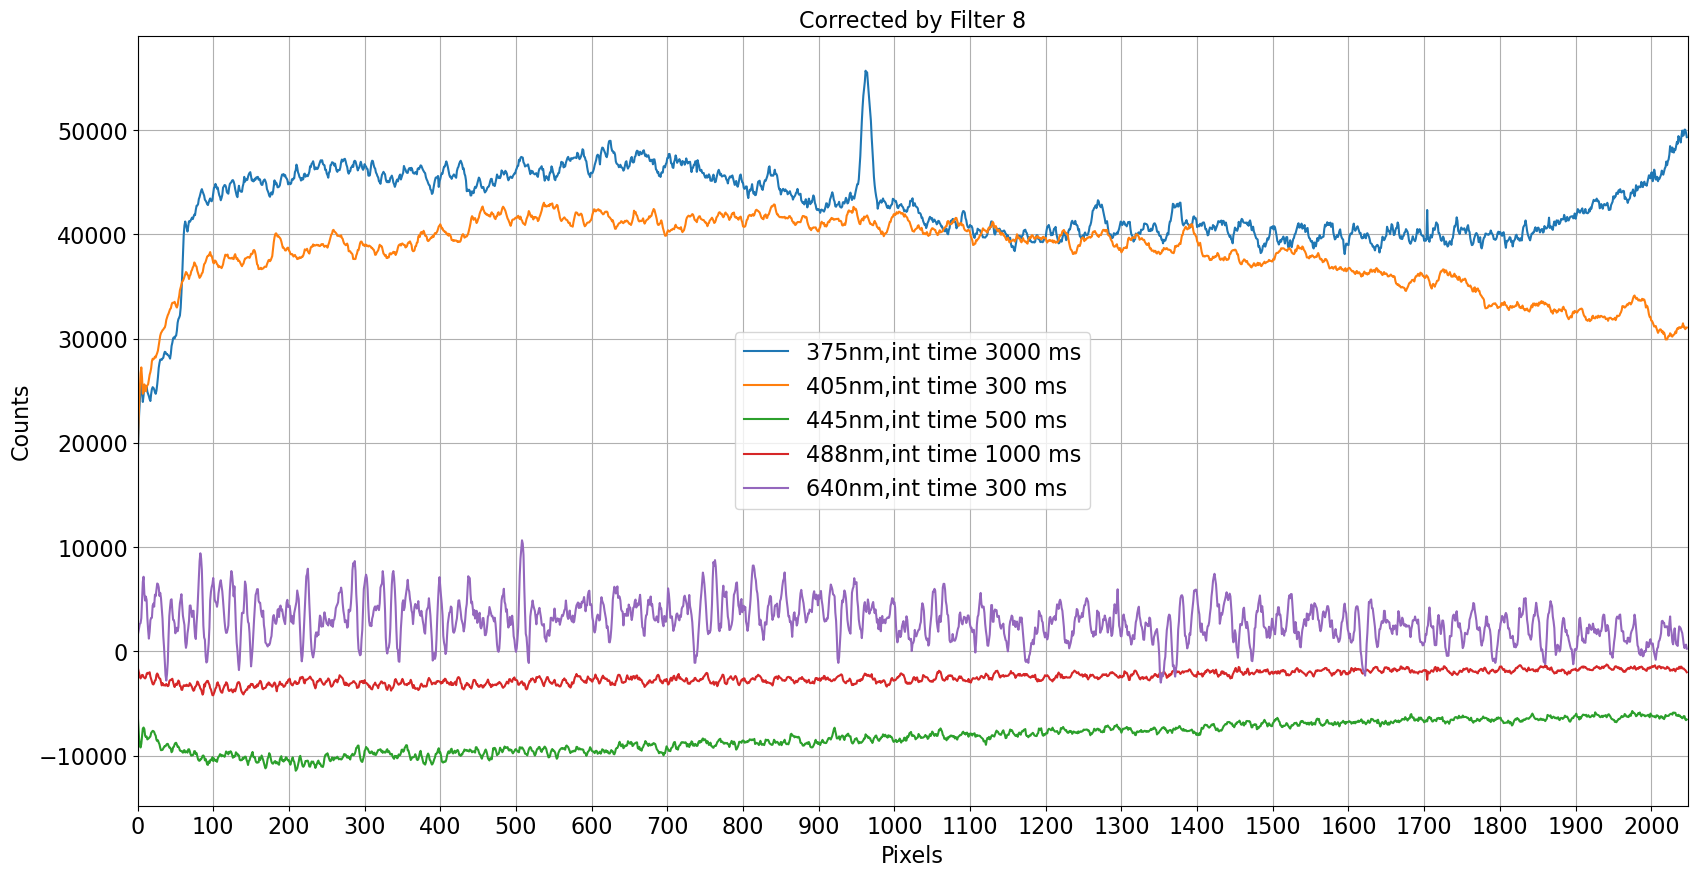

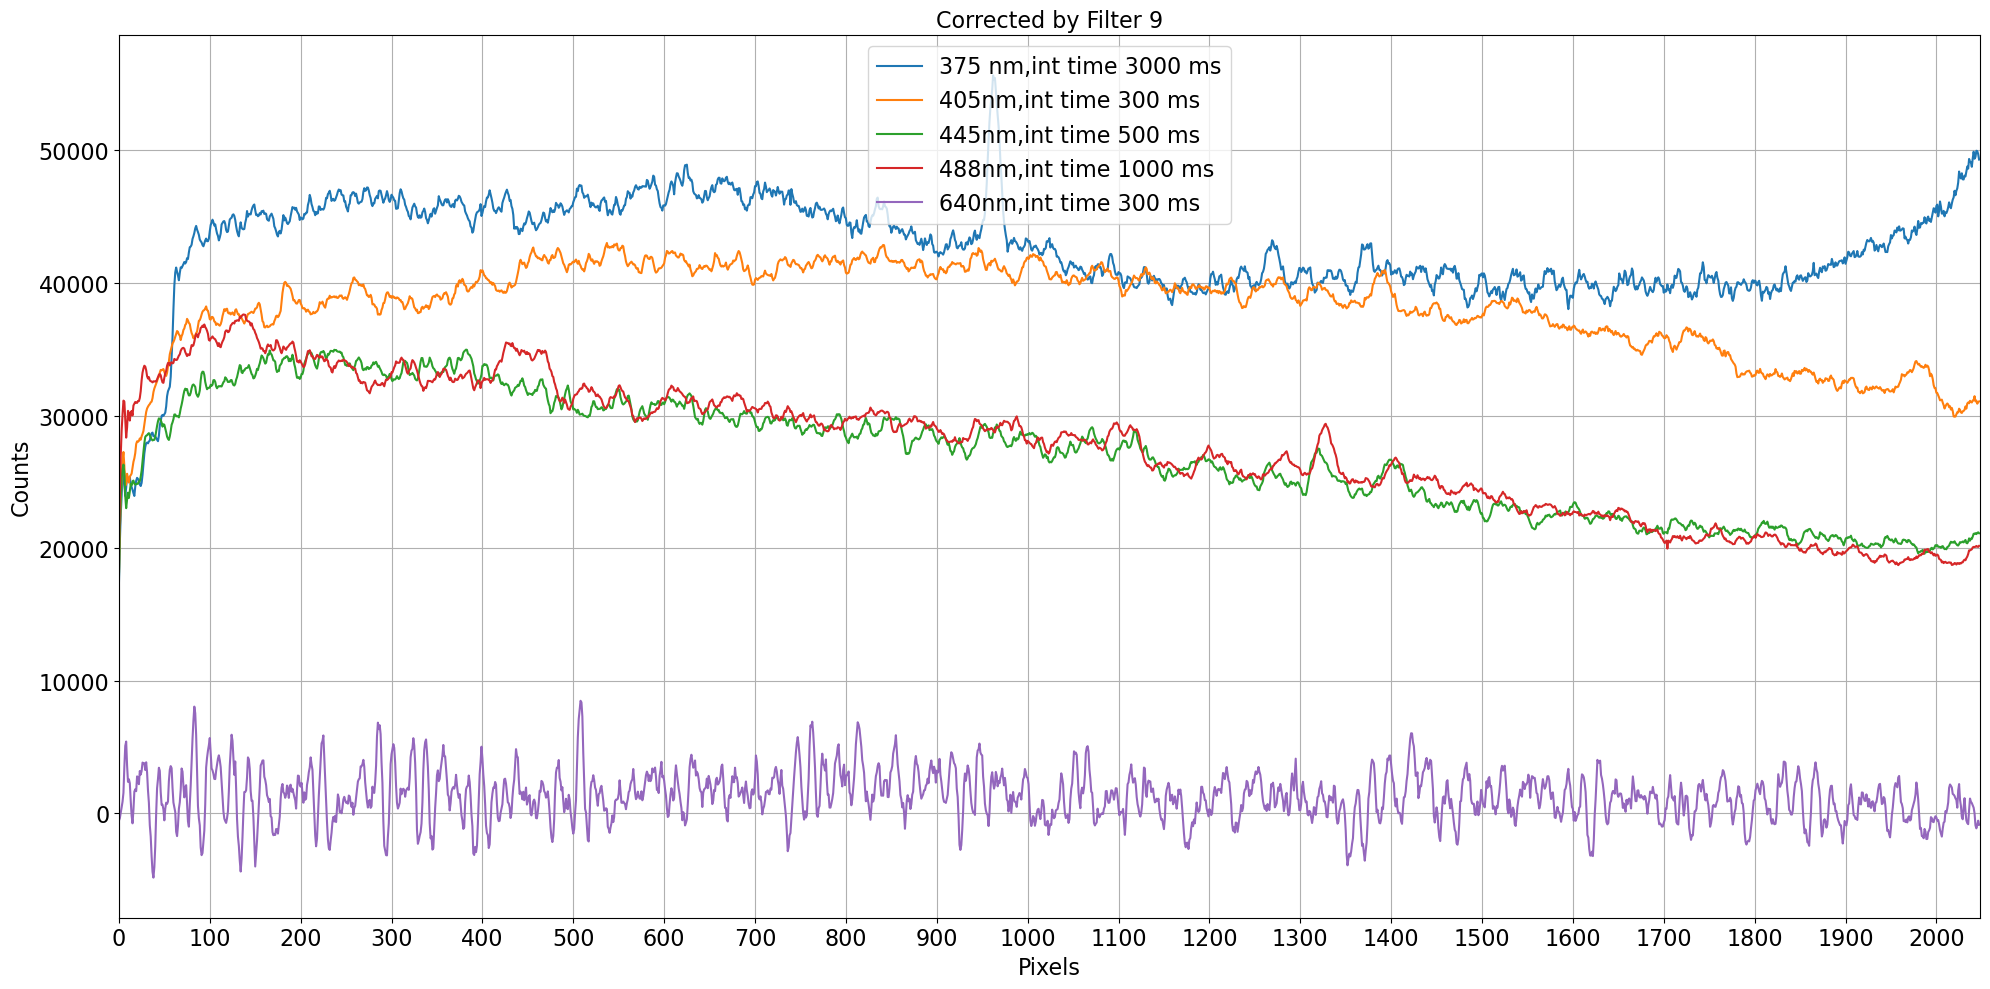

In [121]:
plt.figure(figsize=(20, 10))
# plt.subplot(3, 1, 1)
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(1,2):
    plt.plot(cc_375nm_7[row, :], label= f'375nm,int time {i_375[row]} ms')
    plt.plot(cc_405nm_7[row, :], label= f'405nm,int time {i_405[row]} ms')
    plt.plot(cc_445nm_7[row, :], label= f'445nm,int time {i_445[row]} ms')
    plt.plot(cc_488nm_7[row, :], label= f'488nm,int time {i_488[row]} ms')
    plt.plot(cc_640nm_7[row, :], label= f'640nm,int time {i_640[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
plt.title('Corrected by Filter 7',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()

plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(1,2):
    plt.plot(cc_375nm_8[row, :], label= f'375nm,int time {i_375[row]} ms')
    plt.plot(cc_405nm_8[row, :], label= f'405nm,int time {i_405[row]} ms')
    plt.plot(cc_445nm_8[row, :], label= f'445nm,int time {i_445[row]} ms')
    plt.plot(cc_488nm_8[row, :], label= f'488nm,int time {i_488[row]} ms')
    plt.plot(cc_640nm_8[row, :], label= f'640nm,int time {i_640[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
plt.title('Corrected by Filter 8',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()

plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(1,2):
    plt.plot(cc_375nm_9[row, :], label= f'375 nm,int time {i_375[row]} ms')
    plt.plot(cc_405nm_9[row, :], label= f'405nm,int time {i_405[row]} ms')
    plt.plot(cc_445nm_9[row, :], label= f'445nm,int time {i_445[row]} ms')
    plt.plot(cc_488nm_9[row, :], label= f'488nm,int time {i_488[row]} ms')
    plt.plot(cc_640nm_9[row, :], label= f'640nm,int time {i_640[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
plt.title('Corrected by Filter 9',fontsize=16);plt.legend(fontsize=16);plt.grid(True)

plt.tight_layout()
plt.show()

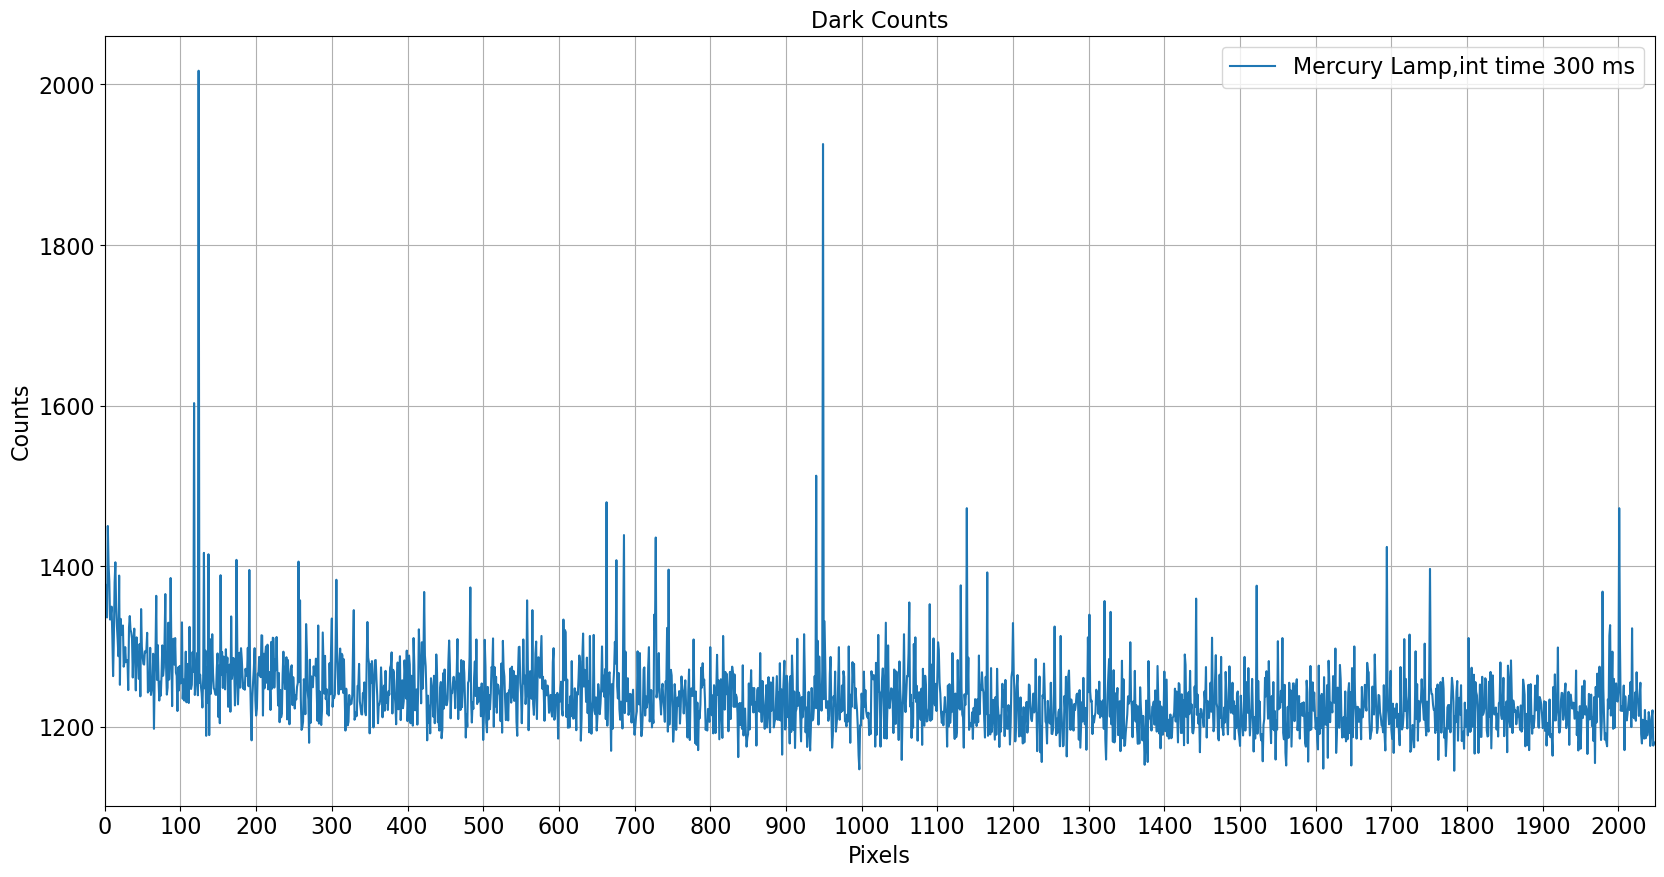

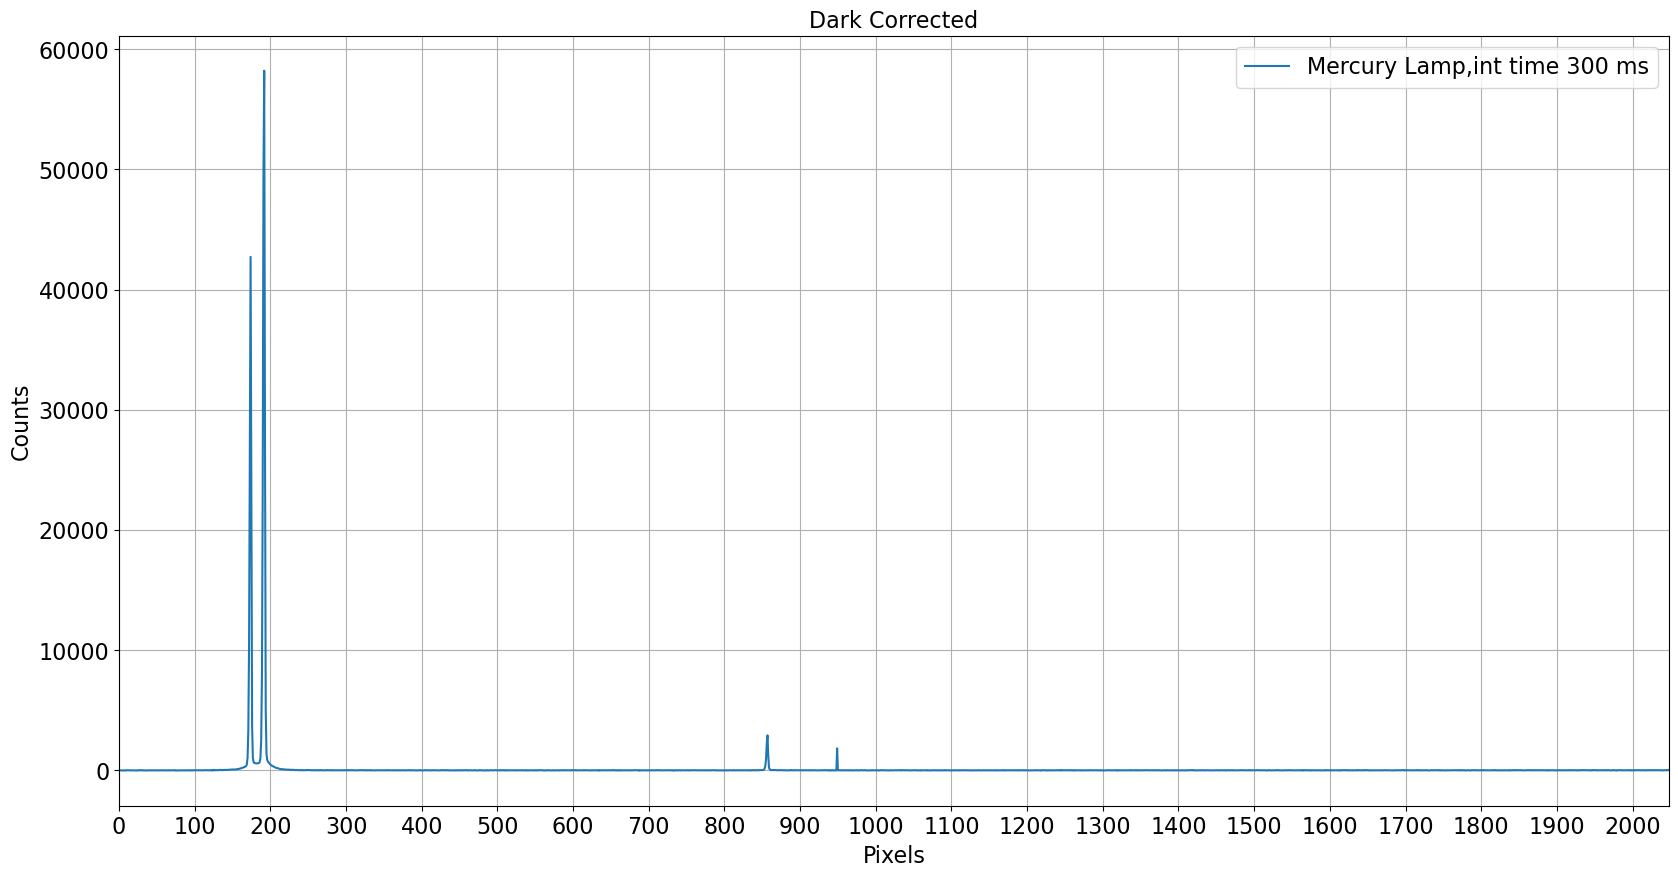

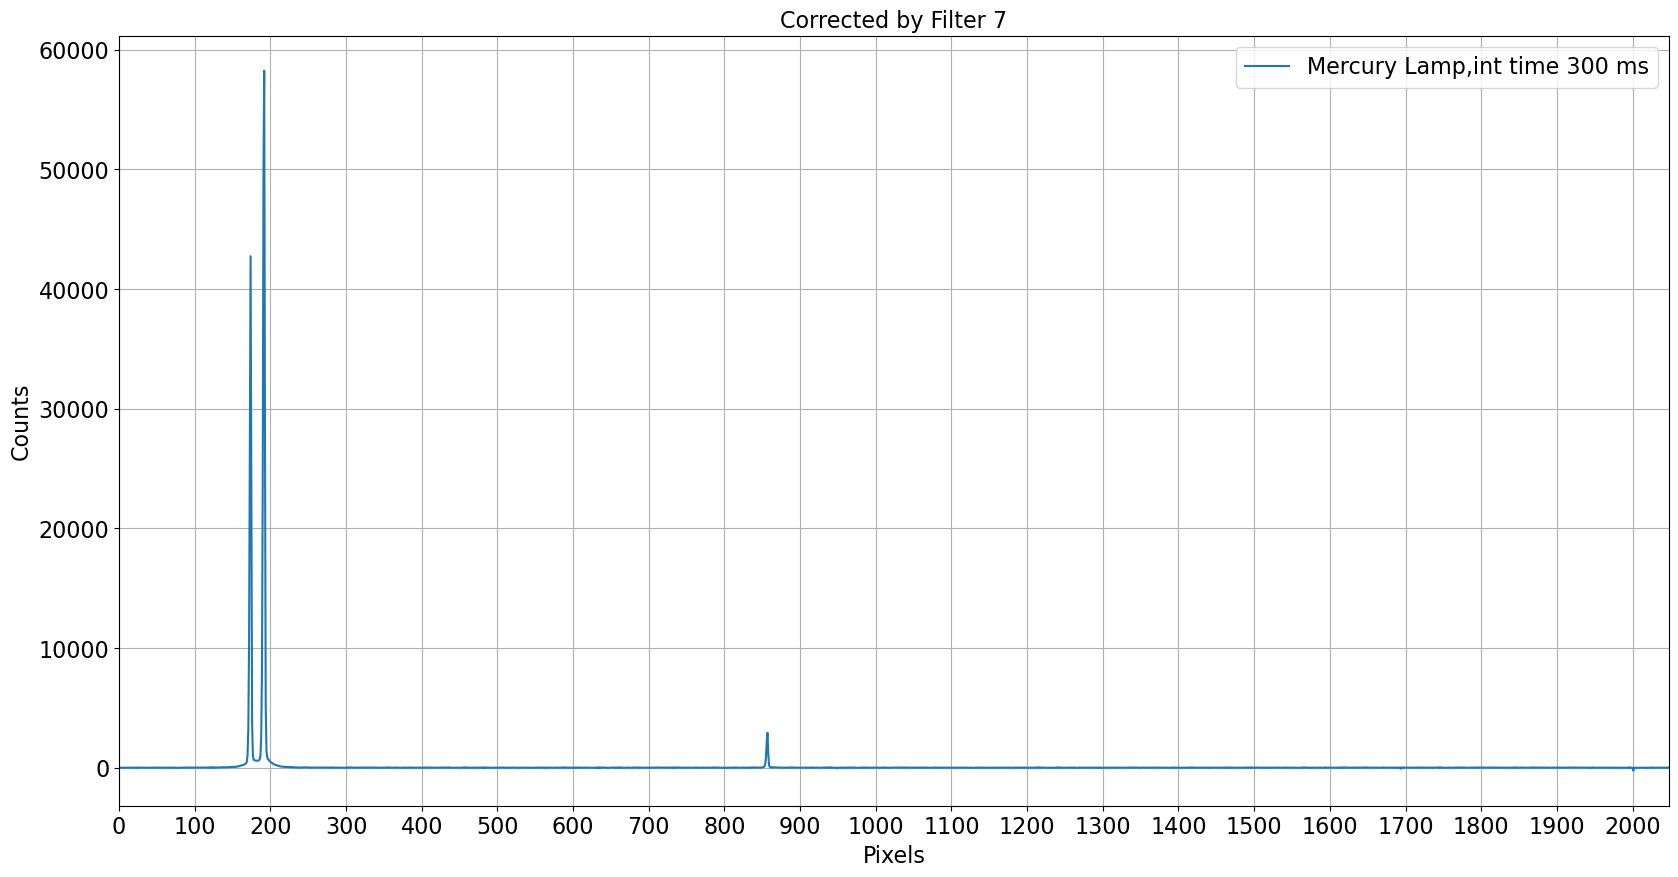

In [153]:
plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(0,1):
    plt.plot(dc_mercury[row, :], label= f'Mercury Lamp,int time {i_mercury[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
# plt.ylim(-1000,22000)
plt.title('Dark Counts',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()

plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(0,1):
    plt.plot(cc_mercury_dc[row, :], label= f'Mercury Lamp,int time {i_mercury[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
# plt.ylim(-1000,22000)
plt.title('Dark Corrected',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()

plt.figure(figsize=(20, 10))
# plt.yscale('log')
plt.xlim(0,2048)
for row in range(0,1):
    plt.plot(cc_mercury_7[row, :], label= f'Mercury Lamp,int time {i_mercury[row]} ms')
plt.xticks(np.arange(0, 2048, 100),fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16)
# plt.ylim(-1000,22000)
plt.title('Corrected by Filter 7',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()

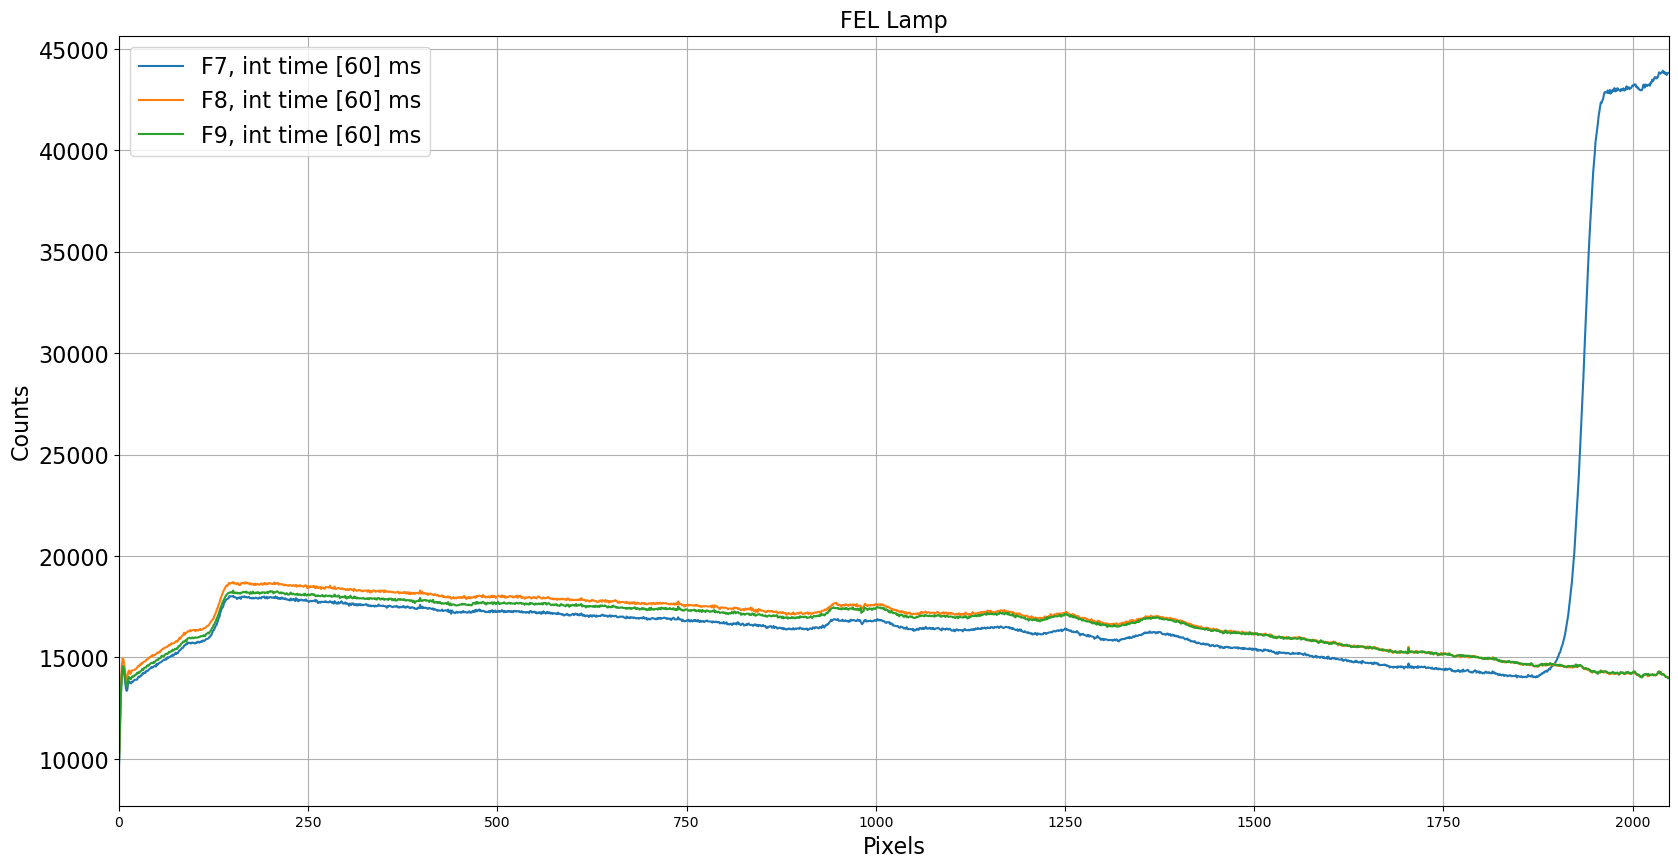

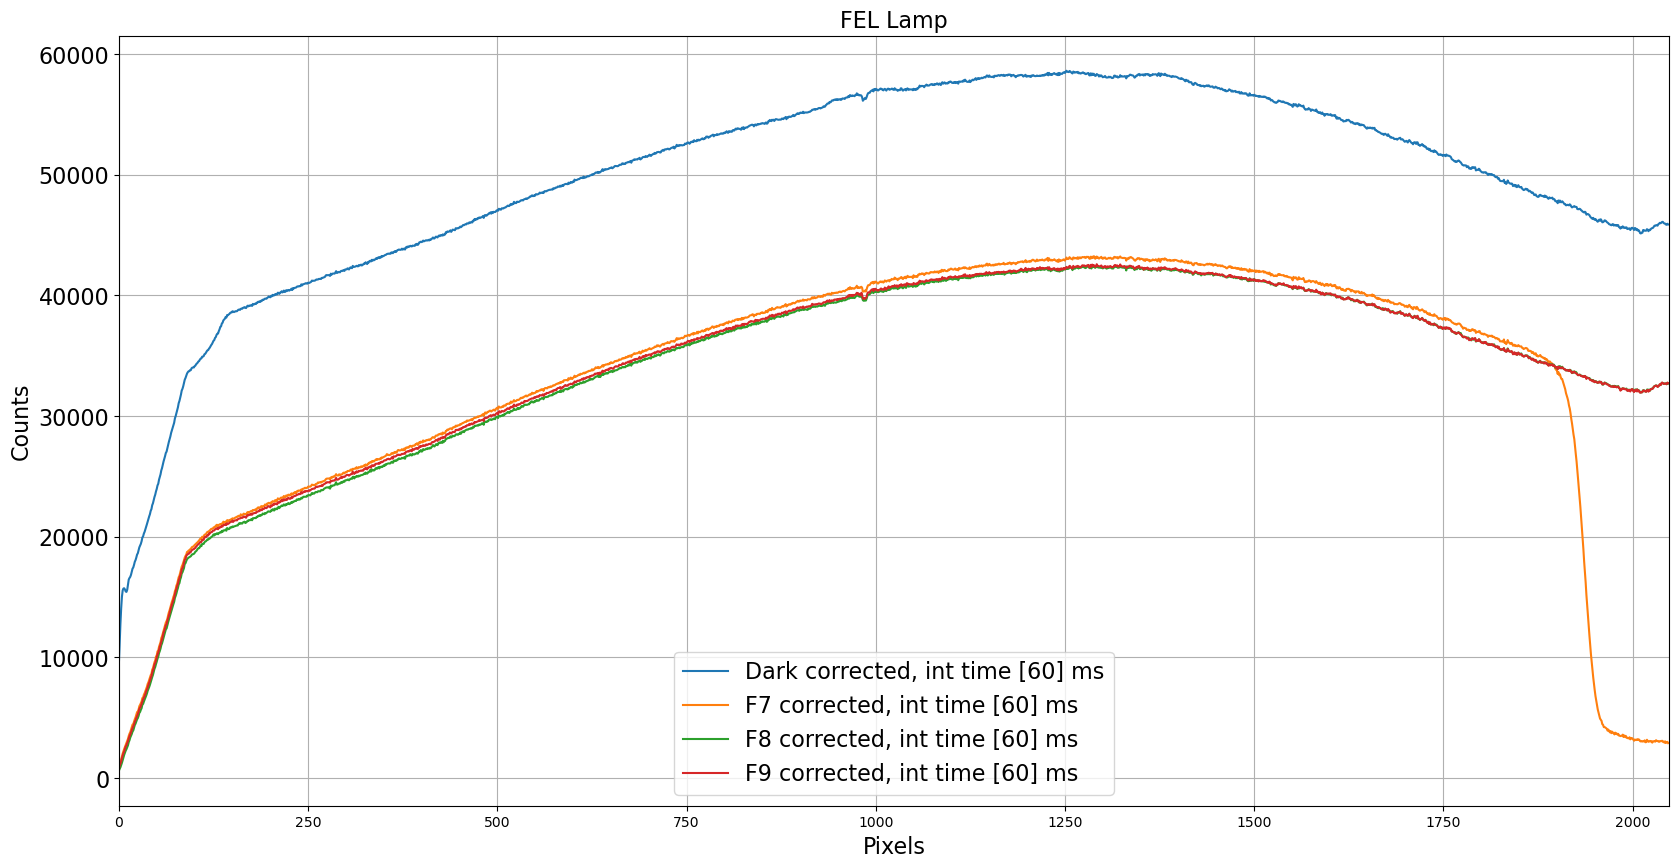

In [179]:
l_fel_bc = ((data9.iloc[59, 26:2074]).div(data9.iloc[59, 24], axis=0)).values
l_fel_7 = ((data9.iloc[60, 26:2074]).div(data9.iloc[60, 24], axis=0)).values
l_fel_8 = ((data9.iloc[61, 26:2074]).div(data9.iloc[61, 24], axis=0)).values
l_fel_9 = ((data9.iloc[62, 26:2074]).div(data9.iloc[62, 24], axis=0)).values
dc_fel = ((data9.iloc[63, 26:2074]).div(data9.iloc[63, 24], axis=0)).values
cc_fel_dc = l_fel_bc - dc_fel
cc_fel_7 = l_fel_bc - l_fel_7
cc_fel_8 = l_fel_bc - l_fel_8
cc_fel_9 = l_fel_bc - l_fel_9
i_fel = np.array([60])

plt.figure(figsize=(20, 10))
plt.xlim(0,2048)
plt.plot(l_fel_7, label= f'F7, int time {i_fel} ms')
plt.plot(l_fel_8, label= f'F8, int time {i_fel} ms')
plt.plot(l_fel_9, label= f'F9, int time {i_fel} ms')
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16);plt.yticks(fontsize=16)
# plt.ylim(12000,20000)
plt.title('FEL Lamp',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()


plt.figure(figsize=(20, 10))
plt.xlim(0,2048)
plt.plot(cc_fel_dc, label= f'Dark corrected, int time {i_fel} ms')
plt.plot(cc_fel_7, label= f'F7 corrected, int time {i_fel} ms')
plt.plot(cc_fel_8, label= f'F8 corrected, int time {i_fel} ms')
plt.plot(cc_fel_9, label= f'F9 corrected, int time {i_fel} ms')
plt.xlabel('Pixels',fontsize=16);plt.ylabel('Counts',fontsize=16);plt.yticks(fontsize=16)
# plt.xlim(900,1000)
plt.title('FEL Lamp',fontsize=16);plt.legend(fontsize=16);plt.grid(True);plt.show()